# 1. Download stock historical data and Library Installation    

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download stock 
tickers = ["SPY", "AAPL", "META", "NVDA", "AMZN"]

from_time = "2023-01-01"
to_time = "2024-06-15"

historical_data = yf.download(tickers, from_time, to_time)

display(historical_data['Adj Close']['META'].head())
display(historical_data['Volume']['META'].head())



[*********************100%%**********************]  5 of 5 completed


Date
2023-01-03    124.365540
2023-01-04    126.987656
2023-01-05    126.558945
2023-01-06    129.629700
2023-01-09    129.081345
Name: META, dtype: float64

Date
2023-01-03    35528500
2023-01-04    32397100
2023-01-05    25447100
2023-01-06    27584500
2023-01-09    26649100
Name: META, dtype: int64

# 2. Plot Adj Close prices of the stock

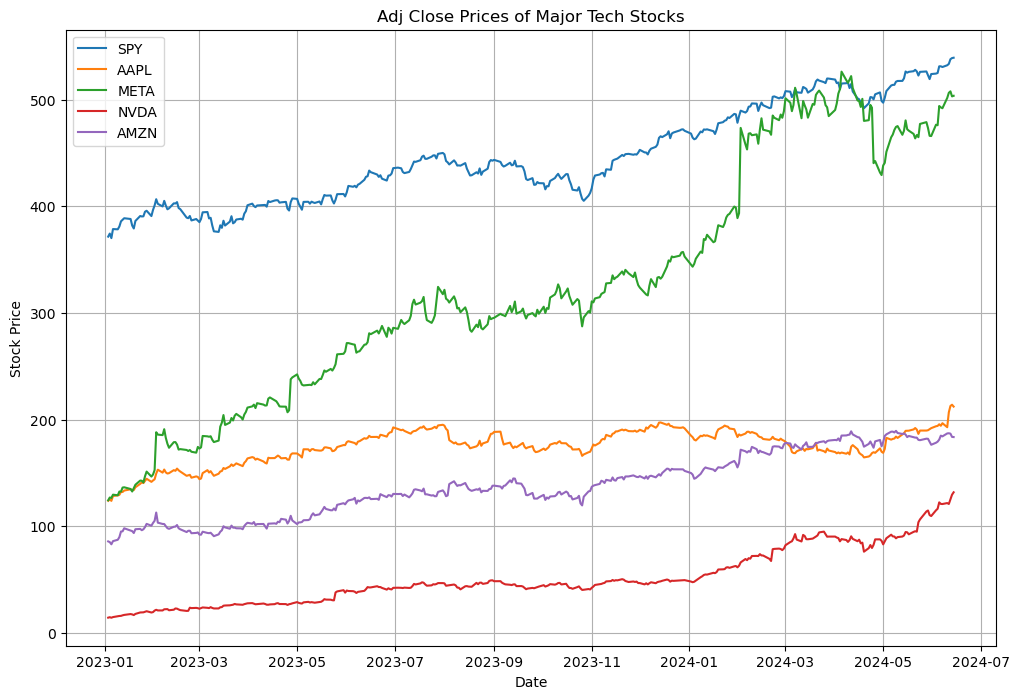

In [3]:
import matplotlib.pyplot as plt

# Plotting Adj Close prices of the stock with legend for each stock
plt.figure(figsize=(12, 8))

for ticker in tickers:
    plt.plot(historical_data['Adj Close'][ticker], label=ticker)

# Adding title and labels
plt.title('Adj Close Prices of Major Tech Stocks')
plt.ylabel('Stock Price')
plt.xlabel('Date')
plt.grid(True)
plt.legend()

plt.show()

# 3. Show & Plot Statistics metrics of Adj Close prices of the stock

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,365.0,174.663379,16.273504,123.855095,168.027344,176.656036,187.299271,213.992310
AMZN,365.0,138.082904,29.898211,83.120003,112.910004,134.910004,168.589996,189.500000
META,365.0,324.185111,110.565897,124.365540,239.598602,308.411407,431.778961,526.314819
NVDA,365.0,51.468035,26.012937,14.255614,29.136765,45.493237,67.457527,131.868729
SPY,365.0,446.362353,45.305287,370.209198,405.671326,437.711029,489.365356,539.380127


<Figure size 1200x800 with 0 Axes>

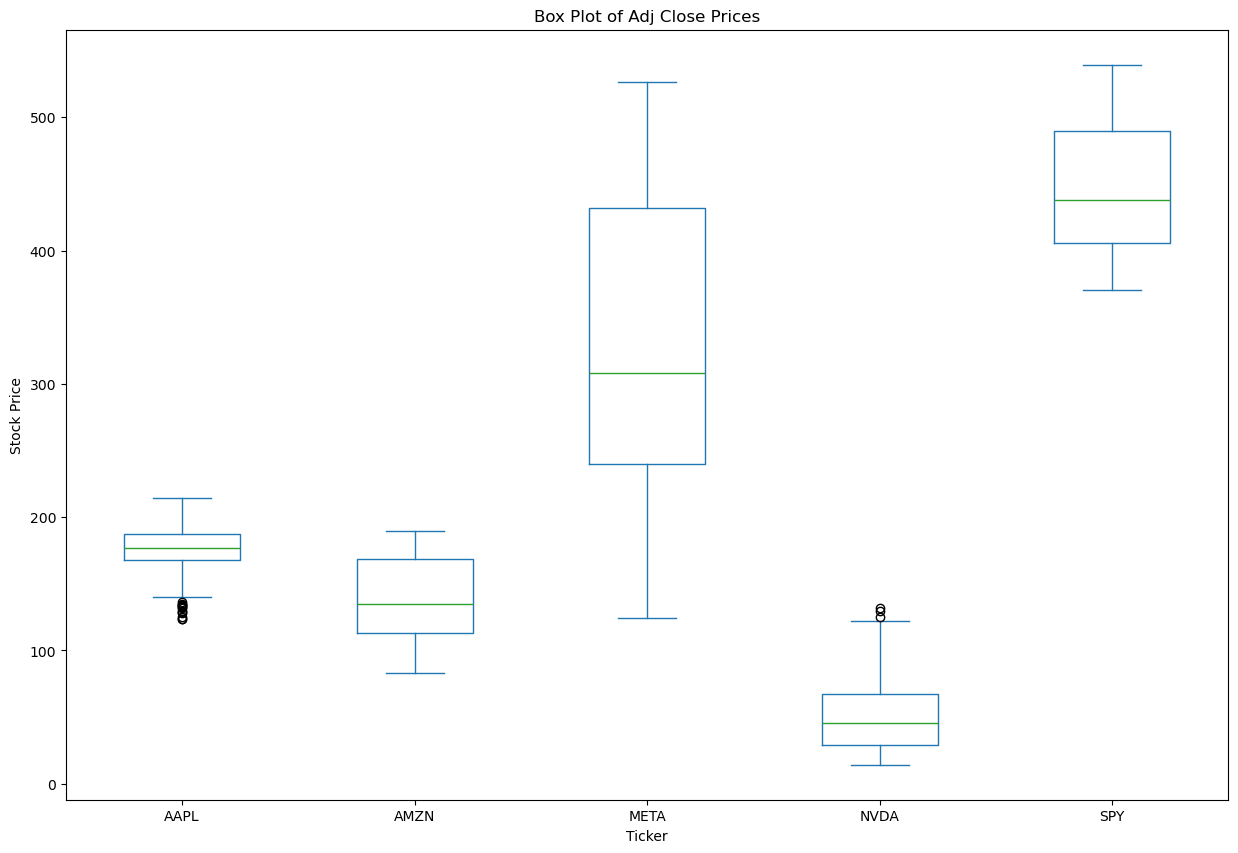

In [4]:
import matplotlib.pyplot as plt


# Calculate mean, median, mode, standard deviation, variance, skewness, and kurtosis
stats_metrics = historical_data['Adj Close'].describe().T

# display the statistics metrics
display(stats_metrics)

# show Box Plot of Adj Close prices of the stock ( show Mean, Median, 1st Quartile, 3rd Quartile, Max, Min, Outliers)
plt.figure(figsize=(12, 8))
historical_data['Adj Close'].plot(kind='box', figsize=(15, 10))
plt.title('Box Plot of Adj Close Prices')
plt.ylabel('Stock Price')
plt.xlabel('Ticker')

plt.show()


# 4. Analyze Log Returns of the stock

<Figure size 1200x800 with 0 Axes>

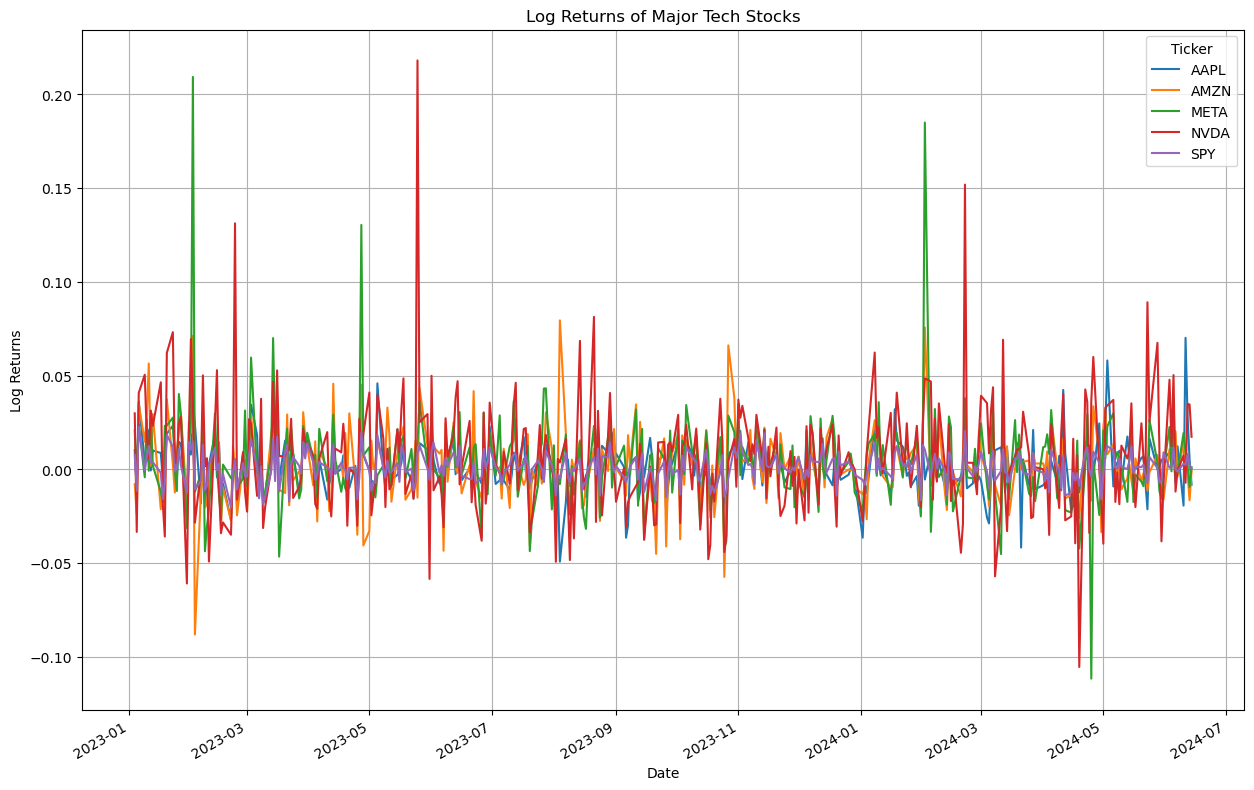

In [5]:
log_returns = np.log(historical_data['Adj Close'] / historical_data['Adj Close'].shift(1))

# drop NaN values
log_returns.dropna(inplace=True)

# plot Log Returns of the stock
plt.figure(figsize=(12, 8))
log_returns.plot(figsize=(15, 10))
plt.title('Log Returns of Major Tech Stocks')
plt.ylabel('Log Returns')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# 5. Calculate Expected Returns, Covariance, Variance and Beta Coefficient, Jensen's Alpha.

--------------------------------------------------
Risk-Free Rate: 0.0138
--------------------------------------------------
Mean Returns of SPY: 0.2579287718978837
--------------------------------------------------
Covariance Matrix:


Ticker,AAPL,AMZN,META,NVDA,SPY
Ticker,,,,,
AAPL,0.000183,0.000097,0.000127,0.000138,0.000067
AMZN,0.000097,0.000367,0.000283,0.000240,0.000094
META,0.000127,0.000283,0.000609,0.000305,0.000111
NVDA,0.000138,0.000240,0.000305,0.000913,0.000132
SPY,0.000067,0.000094,0.000111,0.000132,0.000061


--------------------------------------------------
Standard Deviation:


Ticker
AAPL    0.214913
AMZN    0.304303
META    0.391900
NVDA    0.479581
SPY     0.124420
dtype: float64

--------------------------------------------------
Beta Coefficients:


{'SPY': 1.0,
 'AAPL': 1.0888193875347991,
 'META': 1.8022506906925455,
 'NVDA': 2.154902779191049,
 'AMZN': 1.5302784548251218}

--------------------------------------------------


,Expected Returns,Mean Returns,Beta,Jensen's Alpha
SPY,0.257929,0.257929,1.000000,0.000000
AAPL,0.279612,0.372618,1.088819,0.093006
META,0.453781,0.968341,1.802251,0.514560
NVDA,0.539874,1.537724,2.154903,0.997850
AMZN,0.387385,0.526731,1.530278,0.139346


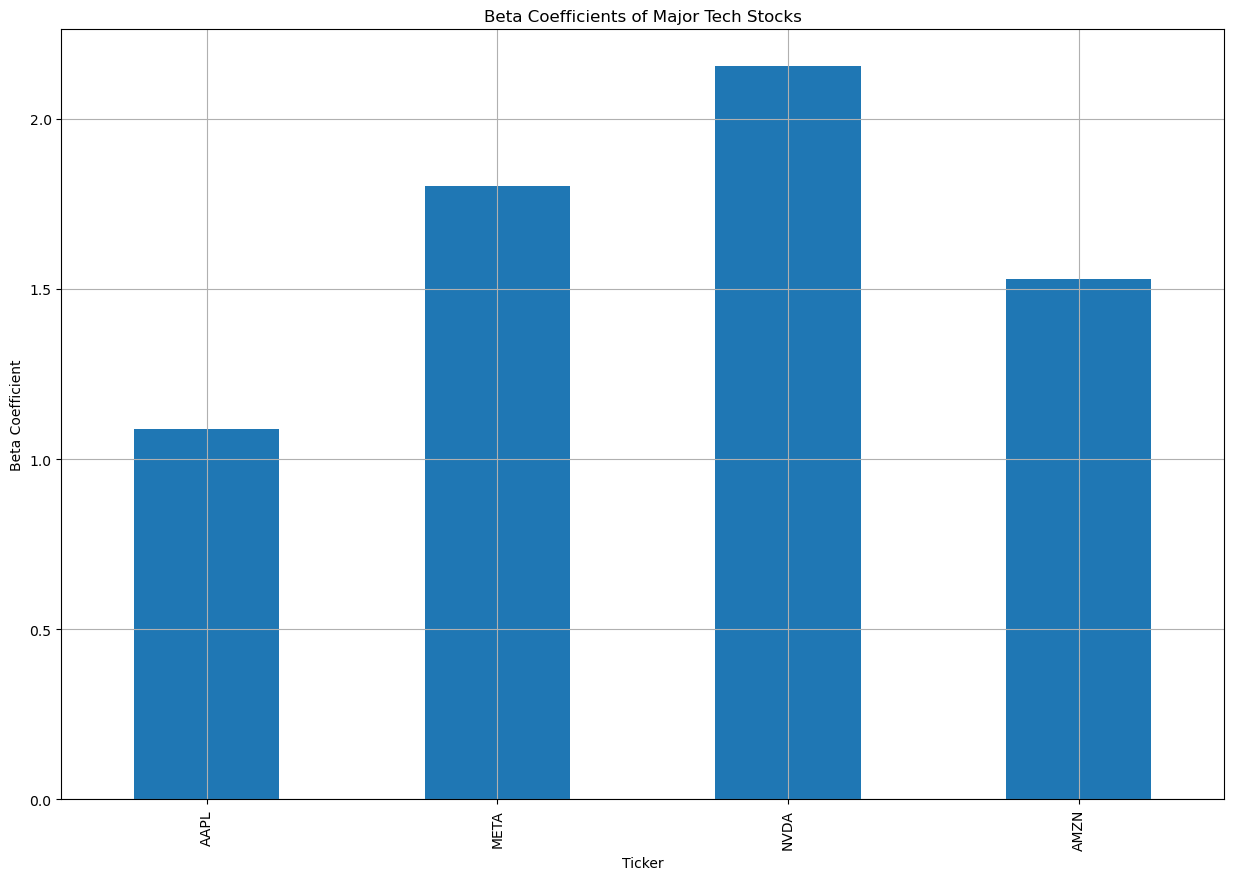

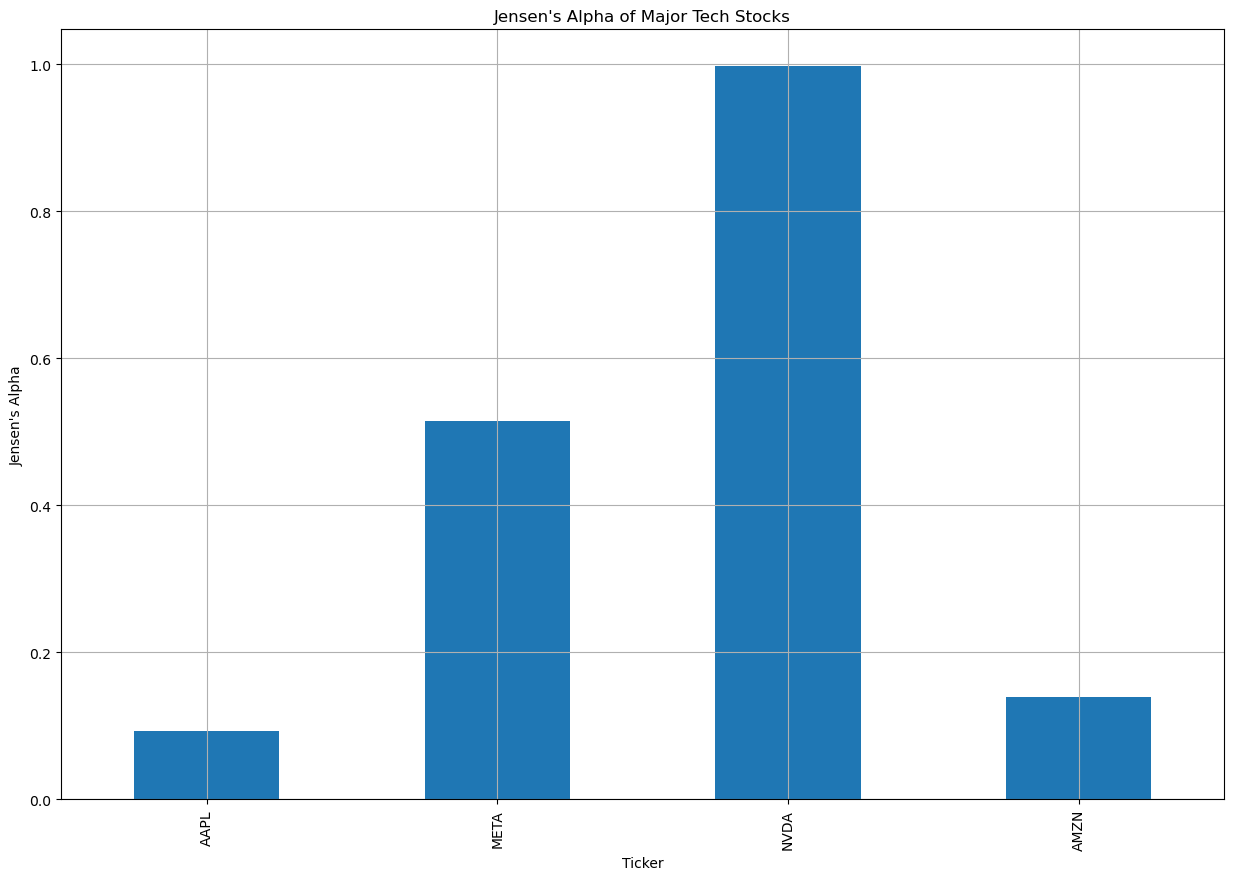

In [6]:
# define risk free rate ( assuming 1.38% per annum )
risk_free_rate = 0.0138

# Calculate mean returns ( one year period)
mean_returns = log_returns.mean() * 252

# Calculate covariance matrix
covariance_matrix = log_returns.cov()

# Calculate Standard Deviation ( one year period)
std_deviation = log_returns.std() * np.sqrt(252)

# Calculate Beta Coefficient
beta_coefficients = {}
for ticker in tickers:
    beta_coefficients[ticker] = covariance_matrix.loc[ticker, 'SPY'] / log_returns['SPY'].var()

# Calculate Expected Returns ( CAPM Model ) 
expected_returns = {}
for ticker in tickers:
    expected_returns[ticker] = risk_free_rate + (beta_coefficients[ticker] * (mean_returns['SPY'] - risk_free_rate))

# Calculate Jensen's Alpha
jensen_alpha = {}
for ticker in tickers:
    if ticker == 'SPY':
        jensen_alpha[ticker] = 0
    else: 
        jensen_alpha[ticker] = mean_returns[ticker] - (risk_free_rate + beta_coefficients[ticker] * (mean_returns['SPY'] - risk_free_rate))



# print Risk-Free Rate, Mean returns of SPY
print('-'*50)
print('Risk-Free Rate:', risk_free_rate)
print('-'*50)
print('Mean Returns of SPY:', mean_returns['SPY'])

# display expected returns, covariance matrix, variance, and beta coefficients
print('-'*50)
print('Covariance Matrix:')
display(covariance_matrix)
print('-'*50)
print('Standard Deviation:')
display(std_deviation)
print('-'*50)
print('Beta Coefficients:')
display(beta_coefficients)
print('-'*50)

# put expected returns & mean returns & Beta & Jensen's Alpha in a DataFrame
df_returns = pd.DataFrame([expected_returns, mean_returns, beta_coefficients, jensen_alpha], index=['Expected Returns', 'Mean Returns', 'Beta', "Jensen's Alpha"]).T
display(df_returns)

# plot beta coefficients ( remove SPY)
plt.figure(figsize=(12, 8))
df_returns['Beta'].drop('SPY').plot(kind='bar', figsize=(15, 10))
plt.title('Beta Coefficients of Major Tech Stocks')
plt.ylabel('Beta Coefficient')
plt.xlabel('Ticker')
plt.grid(True)

# plot Jensen's Alpha ( remove SPY)
plt.figure(figsize=(12, 8))
df_returns["Jensen's Alpha"].drop('SPY').plot(kind='bar', figsize=(15, 10))
plt.title('Jensen\'s Alpha of Major Tech Stocks')
plt.ylabel('Jensen\'s Alpha')
plt.xlabel('Ticker')
plt.grid(True)

# 6. Efficient Frontier of Portfolios ( No Risk-Free Rate ) 
# - Maximum Sharpe Ratio
# - Minimum Volatility
# - Minimum VaR

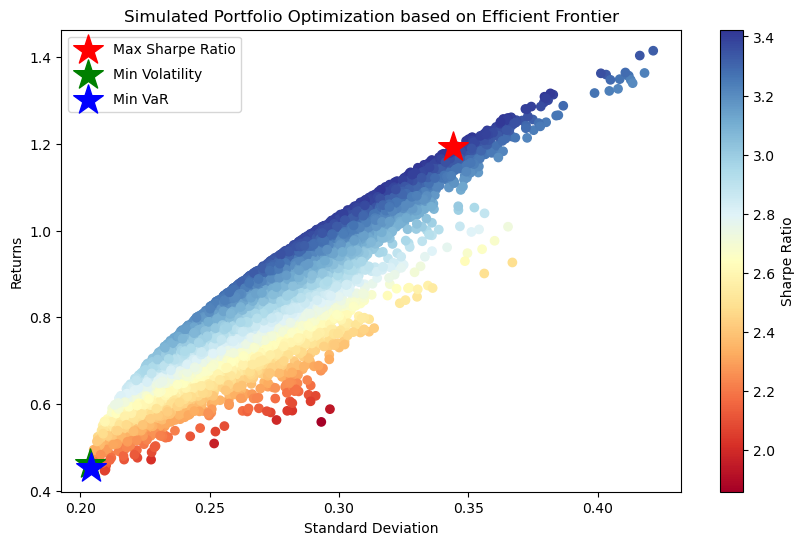

Max Sharpe Ratio Portfolio Allocation

Annualised Return: 1.19
Annualised Volatility: 0.34
Sharpe Ratio: 3.42
Weights: {'AAPL': 0.13679349769848742, 'AMZN': 0.009724466651992563, 'META': 0.3107355247300816, 'NVDA': 0.5427465109194384}


Min Volatility Portfolio Allocation

Annualised Return: 0.46
Annualised Volatility: 0.2
Sharpe Ratio: 2.2
Weights: {'AAPL': 0.746114623837719, 'AMZN': 0.17884706548931492, 'META': 0.045074381058468886, 'NVDA': 0.029963929614497543}


Min VaR Portfolio Allocation

Annualised Return: 0.45
Annualised Volatility: 0.2
Sharpe Ratio: 2.15
Weights: {'AAPL': 0.6608643945845925, 'AMZN': 0.30422505434125635, 'META': 0.01429837545780683, 'NVDA': 0.020612175616344278}


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Giả định có dữ liệu log returns và tickers đã được tính toán từ trước
# log_returns = ... (sử dụng dữ liệu thực tế của bạn)
# tickers = ["SPY", "AAPL", "META", "NVDA", "AMZN"]

# Thiết lập các thông số
num_portfolios = 10000
risk_free_rate = 0.0138
confidence_level = 0.05  # 95% confidence level

# temp returns chỉ chứa các tickers cần tính hiệu suất
temp_returns = log_returns.drop('SPY', axis=1)
temp_tickers = list(temp_returns.columns)


# Tính toán các thông số thống kê cần thiết
mean_returns = temp_returns.mean() * 252
cov_matrix = temp_returns.cov() * 252

# Hàm tính toán hiệu suất danh mục đầu tư và VaR
def calc_portfolio_perf(weights, mean_returns, cov_matrix, rf):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    portfolio_var = norm.ppf(1 - confidence_level, portfolio_return, portfolio_std)
    return portfolio_return, portfolio_std, sharpe_ratio, portfolio_var

# Mô phỏng các danh mục đầu tư ngẫu nhiên
results = np.zeros((5, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(temp_tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return, portfolio_std, sharpe_ratio, portfolio_var = calc_portfolio_perf(weights, mean_returns, cov_matrix, risk_free_rate)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio
    results[3, i] = portfolio_var

results[4] = np.arange(num_portfolios)

# Tìm danh mục có tỷ lệ Sharpe cao nhất, độ biến động thấp nhất và giá trị VaR thấp nhất
max_sharpe_idx = np.argmax(results[2])
min_vol_idx = np.argmin(results[1])
min_var_idx = np.argmin(results[3])

# Lưu trữ thông tin của các danh mục tối ưu
max_sharpe_port = results[:, max_sharpe_idx]
min_vol_port = results[:, min_vol_idx]
min_var_port = results[:, min_var_idx]

# Lưu trữ weights của các danh mục tối ưu
max_sharpe_weights = weights_record[int(max_sharpe_port[4])]
min_vol_weights = weights_record[int(min_vol_port[4])]
min_var_weights = weights_record[int(min_var_port[4])]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='RdYlBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='g', s=500, label='Min Volatility')
plt.scatter(min_var_port[1], min_var_port[0], marker='*', color='b', s=500, label='Min VaR')
plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.legend(labelspacing=0.8)
plt.show()

print("Max Sharpe Ratio Portfolio Allocation\n")
print("Annualised Return:", round(max_sharpe_port[0], 2))
print("Annualised Volatility:", round(max_sharpe_port[1], 2))
print("Sharpe Ratio:", round(max_sharpe_port[2], 2))
print("Weights:", dict(zip(temp_tickers, max_sharpe_weights)))
print("\n")

print("Min Volatility Portfolio Allocation\n")
print("Annualised Return:", round(min_vol_port[0], 2))
print("Annualised Volatility:", round(min_vol_port[1], 2))
print("Sharpe Ratio:", round(min_vol_port[2], 2))
print("Weights:", dict(zip(temp_tickers, min_vol_weights)))
print("\n")

print("Min VaR Portfolio Allocation\n")
print("Annualised Return:", round(min_var_port[0], 2))
print("Annualised Volatility:", round(min_var_port[1], 2))
print("Sharpe Ratio:", round(min_var_port[2], 2))
print("Weights:", dict(zip(temp_tickers, min_var_weights)))


